**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from scipy import optimize
from types import SimpleNamespace
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from exercise1 import ProductionEconomy

econ = ProductionEconomy()

print(f'{econ.utility(0.8, 1, 1):.4f} <> {econ.utility(0.858, 1, 1):.4f} <> {econ.utility(0.9, 1, 1):.4f}')
econ.utility(0.8, 1, 1)

-0.5192 <> -0.5154 <> -0.5174


-0.5191667042540692

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [3]:
# 1 Create p1 and p2 vector
p1_vec = np.linspace(0.1, 2.0, 10)
p2_vec = np.linspace(0.1, 2.0, 10)

# 2 Loop through p1 and p2 and append market errors to a list.
errors = [] # List to store errors
e1_best, e2_best, e3_best, p1_best, p2_best = 10, 10, 10, 10, 10 # Initial best

for p1 in p1_vec:
    for p2 in p2_vec:
        e1, e2, e3 = econ.check_market_clearing(p1, p2)
        errors.append((p1, p2, e1, e2, e3))

        # Finding the prices which lead to market equilibrium
        sum_error = np.abs(e1) + np.abs(e2) + np.abs(e3) # Expression for total market error
        if sum_error < np.abs(e1_best) + np.abs(e2_best) + np.abs(e3_best):
            e1_best, e2_best, e3_best = e1, e2, e3 # Save new smallest errors
            # Save prices which lead to lowest market error
            p1_best = p1
            p2_best = p2

print(f'p1_best = {p1_best:.3f} and p2_best = {p2_best:.3f}')

p1_best = 0.944 and p2_best = 1.578


In [4]:
# 3 Graph market errors as a function of p1 and p2
p2_slider = FloatSlider(value=1.0, min=0.1, max=2.0, step=0.05, description='p2')
interact(econ.plot_error, p2_cons = p2_slider)

interactive(children=(FloatSlider(value=1.0, description='p2', max=2.0, min=0.1, step=0.05), Output()), _dom_c…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [5]:
p1_opt, p2_opt = econ.market_equilibrium()

print(f'Market clearing prices:')
print(f'p1* = {p1_opt:.3f}\np2* = {p2_opt:.3f}')

Market clearing prices:
p1* = 0.976
p2* = 1.491


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [6]:
# write your answer here

government = ProductionEconomy()

t_best = 1
swf_best = -10

for t in np.linspace(0, 1, 30):
    swf_now = government.SWF_equilibrium(t)
    if swf_now > swf_best:
        swf_best = swf_now
        t_best = t

In [7]:
util_temp = government.SWF_equilibrium(0) + government.par.kappa*government.y_2(government.market_equilibrium()[1])

print(util_temp == econ.utility(econ.l_star(p1_opt, p2_opt), p1_opt, p2_opt))

True


In [8]:
print(f'optimal tax = {t_best:.3f}')
government.par.tau = t_best

print(f'implied lump sum T = {government.par.T:.3f}')

optimal tax = 0.172
implied lump sum T = 0.000


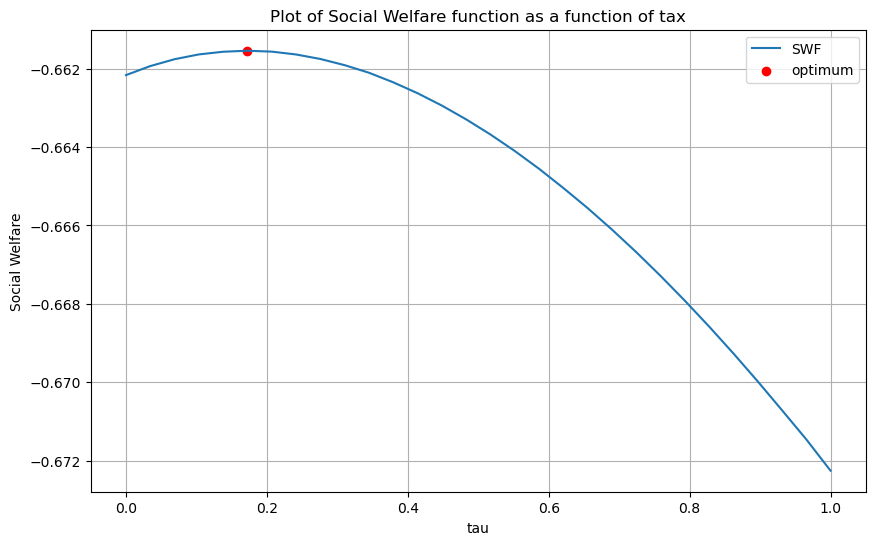

In [9]:
# 1. Create an array of x values from 0 to 1
x_values = np.linspace(0, 1, 30)  

# 2. Compute the y values using the SWF_equilibrium function
y_values = [government.SWF_equilibrium(x) for x in x_values]

# 3. Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='SWF')
plt.scatter(t_best, swf_best, label = "optimum", color="r")
plt.xlabel('tau')
plt.ylabel('Social Welfare')
plt.title('Plot of Social Welfare function as a function of tax')
plt.legend()
plt.grid(True)
plt.show()

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [27]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [28]:
# write your answer here
np.random.seed(101)

def epsilon(n):
    n = n
    eps = np.random.normal(loc=0, scale = par.sigma, size = n)
    return eps

# Expected utilities
def u1():
    u1 = par.v[0] + np.mean(epsilon())
    return u1

def u2():
    u2 = par.v[1] + np.mean(epsilon())
    return u2

def u3():
    u3 = par.v[2] + np.mean(epsilon())
    return u3



In [29]:
# Average realized utility
print(u1())
print(u2())
print(u3())

1.0290826359605536
1.980093148095711
2.9928960735666195


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [94]:
# Write your answer here 
np.random.seed(101)

def simulation_1(i):
    results = []
    i = i
    
    for _ in range(par.K):

        # Draw friend errors
        e_j1 = epsilon(i)
        e_j2 = epsilon(i)
        e_j3 = epsilon(i)

        # Calculating priors
        u1_j = 1 + np.mean(e_j1)
        u2_j = 2 + np.mean(e_j2)
        u3_j = 3 + np.mean(e_j3)

        # Indexing draws
        u_j = [u1_j, u2_j, u3_j]
        j = [1, 2, 3]

        # Indexing to choose correct J career move
        u_max_index = np.argmax(u_j)
        j_max = j[u_max_index]
        u_prior = u_j[u_max_index]

        # Draw own errors
        e_i1 = epsilon(1)
        e_i2 = epsilon(1)
        e_i3 = epsilon(1)

        # Realized careers
        u1_i = 1 + e_i1
        u2_i = 2 + e_i2
        u3_i = 3 + e_i3
        
        u_i = [u1_i, u2_i, u3_i]
        realized_j = u_i[j_max-1]
        
        results.append((j_max, u_prior, realized_j))

    return results

In [102]:
count_frac_list = []
mean_u_prior_list = []
mean_realized_j_list = []
difference_list = []

for i in par.F:
    results = simulation_1(i)
    j_vec, u_prior_vec, realized_j_vec = zip(*results)
    
    count = np.bincount(j_vec)[1:]
    count_frac = count/len(j_vec)

    mean_u_prior = np.mean(u_prior_vec)
    mean_realized_j = np.mean(realized_j_vec)
    difference = mean_u_prior - mean_realized_j

    count_frac_list.append(count_frac)
    mean_u_prior_list.append(mean_u_prior)
    mean_realized_j_list.append(mean_realized_j)
    difference_list.append(difference)


df = pd.DataFrame({
    'Person': range(1, 11),
    'Mean_u_prior': mean_u_prior_list,
    'Mean_realized_j': mean_realized_j_list,
    'Difference': difference_list
})

In [103]:
df = df.round(2)
print(df.to_string(index=False))

 Person  Mean_u_prior  Mean_realized_j  Difference
      1          3.91             2.43        1.49
      2          3.48             2.56        0.92
      3          3.33             2.61        0.72
      4          3.22             2.65        0.57
      5          3.17             2.72        0.45
      6          3.14             2.79        0.34
      7          3.11             2.80        0.31
      8          3.08             2.77        0.31
      9          3.07             2.86        0.21
     10          3.06             2.84        0.22


In [109]:
# Plotting fractions
def plot_count_frac(i):
    X = [1, 2, 3]
    fig, ax = plt.subplots(figsize=(8, 6)) 
    bars = ax.bar(X, count_frac_list[i-1], color=['blue', 'r', 'green'])
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge')

    plt.xlabel('Career path')
    plt.ylabel('Fraction')
    plt.title('Share of person i in each career path')
    plt.xticks(list(X))
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for fractions
    plt.show()

interact(plot_count_frac, i=widgets.IntSlider(min=1, max=len(count_frac_list), step=1, value=1))

interactive(children=(IntSlider(value=1, description='i', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_count_frac(i)>

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [19]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [20]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [21]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [22]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [23]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [24]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [25]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [26]:
# write your answer here